In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [92]:
inflace = pd.read_csv('data/spotrebitelske_ceny.csv', encoding='utf-8')

In [93]:
inflace['ucel_txt'] = inflace['ucel_txt'].str.replace('a\xa0', 'a ')

In [94]:
inflace['ucel_txt'].fillna('total', inplace=True)

/tmp/ipykernel_63020/904079684.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inflace['ucel_txt'].fillna('total', inplace=True)


In [96]:
inflace['casz_txt'].unique()

array(['průměr bazického roku', 'stejných 12 měsíců předchozího roku',
       'stejné období předchozího roku', 'předchozí období'], dtype=object)

In [97]:
monthly = inflace[inflace['casz_txt'] == 'stejné období předchozího roku']

In [101]:
table = monthly[monthly['ucel_txt'] == 'total'].sort_values(['rok', 'mesic'])

In [150]:
table2 = monthly[monthly['ucel_txt'] == 'Rekreace a kultura'].sort_values(['rok', 'mesic'])

In [151]:
pivot = table2.pivot(index='rok', columns='mesic', values='hodnota')

Text(95.72222222222221, 0.5, 'Year')

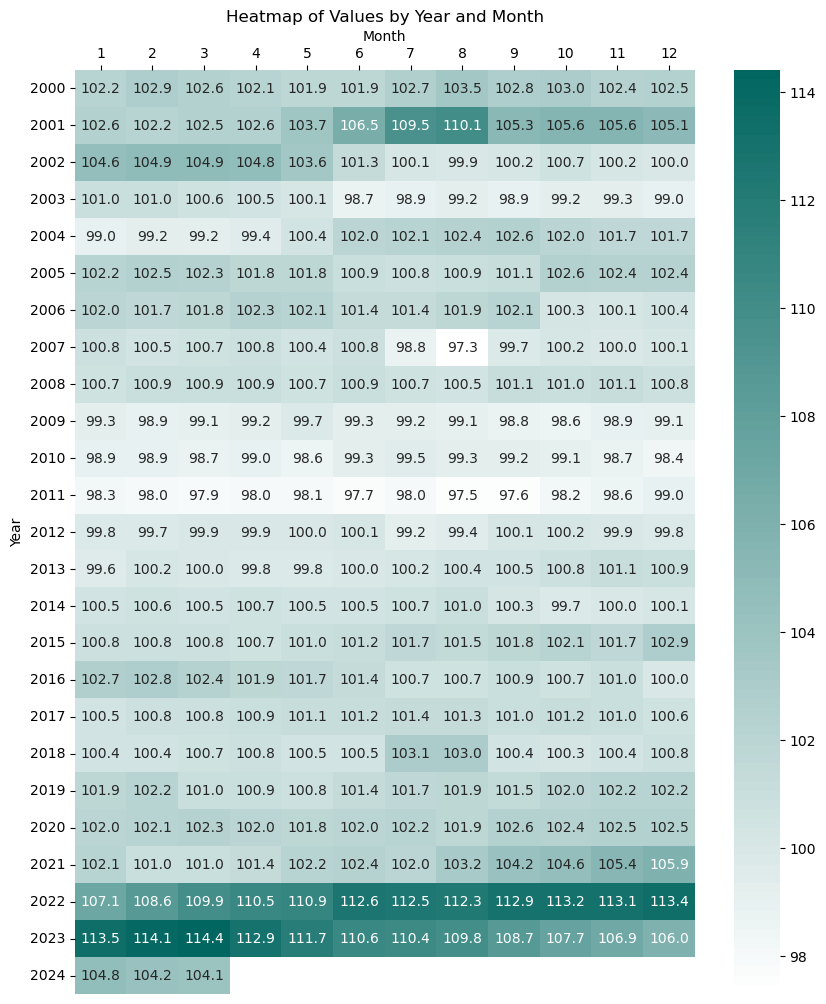

In [152]:
central_color = "#026660"
colors = [(1, 1, 1), central_color]  # from white to the central color
n_bins = 100 
cmap_name = 'custom_cmap'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

plt.figure(figsize=(10, 12))
ax = sns.heatmap(pivot, cmap=cm, annot=True, fmt=".1f")
plt.title('Heatmap of Values by Year and Month')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(axis='y', labelrotation=0)
plt.xlabel('Month')
plt.ylabel('Year')

In [89]:
total = inflace[inflace['ucel_txt'] == 'total'].sort_values('rok')

In [11]:
mezirocni = inflace[inflace['casz_txt'] == 'stejných 12 měsíců předchozího roku']
mezirocni = mezirocni[['hodnota', 'mesic', 'rok', 'obdobiod', 'obdobido', 'bazobdobido', 'ucel_txt']]
prosinec = mezirocni[mezirocni['mesic'] == 12]

In [83]:
inflace[inflace['ucel_txt'] == 'Doprava'].copy()['rok'].unique()

array([2018, 2013, 2010, 2011, 2016, 2017, 2002, 2012, 2004, 2005, 2006,
       2007, 2008, 2003, 2014, 2000, 2001, 2009, 2015, 1995, 1996, 1997,
       1998, 1999, 2019, 2020, 2021, 2022, 2023, 2024])

In [88]:
inflace[inflace['rok'] < 2000]

,idhod,hodnota,stapro_kod,ucel_tep,ucel_cis,ucel_kod,casz_kod,mesic,rok,obdobiod,obdobido,bazobdobiod,bazobdobido,ucel_txt,casz_txt
3057,772272974,69.1,6134,NaN,NaN,NaN,Z,8,1998,1998-08-01,1998-08-31,2015-01-01,2015-12-31,total,průměr bazického roku
3058,772272975,69.2,6134,NaN,NaN,NaN,Z,9,1998,1998-09-01,1998-09-30,2015-01-01,2015-12-31,total,průměr bazického roku
3059,772272976,69.1,6134,NaN,NaN,NaN,Z,10,1998,1998-10-01,1998-10-31,2015-01-01,2015-12-31,total,průměr bazického roku
3060,772272977,68.9,6134,NaN,NaN,NaN,Z,11,1998,1998-11-01,1998-11-30,2015-01-01,2015-12-31,total,průměr bazického roku
3061,772272978,68.8,6134,NaN,NaN,NaN,Z,12,1998,1998-12-01,1998-12-31,2015-01-01,2015-12-31,total,průměr bazického roku
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12054,772291809,89.6,6134,CZCOICOP,5642.0,7.0,Z,10,1999,1999-10-01,1999-10-31,2015-01-01,2015-12-31,Doprava,průměr bazického roku
12060,772291246,38.7,6134,CZCOICOP,5642.0,6.0,Z,2,1997,1997-02-01,1997-02-28,2015-01-01,2015-12-31,Zdraví,průměr bazického roku
12061,772291247,38.7,6134,CZCOICOP,5642.0,6.0,Z,3,1997,1997-03-01,1997-03-31,2015-01-01,2015-12-31,Zdraví,průměr bazického roku
12062,772291248,40.6,6134,CZCOICOP,5642.0,6.0,Z,4,1997,1997-04-01,1997-04-30,2015-01-01,2015-12-31,Zdraví,průměr bazického roku


In [79]:
def plot_area(sectors):
    fig, ax = plt.subplots()
    for sector in sectors:
        data = prosinec[prosinec['ucel_txt'] == sector].copy()
        data.sort_values(by=['rok', 'mesic'], inplace=True)
        ax.plot(data['rok'], data['hodnota']-100, marker='o', color="#00BDB1", mec="#026660", mfc="#039188")
        max_hodnota = max(data['hodnota'])
    ax.tick_params(axis='x', labelrotation=45)
    #plt.legend(sectors)
    ax.set_xticks(data['rok'])
    #ax.set_yticks([0, 1, 2, 3, 4, 5, 6,7,8,9, 10,11,12,13,14,15])
    #set y ticks from 0 every 2 steps:
    ax.set_yticks(np.arange(0, max_hodnota-100, 2))
    ax.grid(True, axis='y', alpha=0.5, linestyle='--')
    ax.set_xlabel('Year')
    ax.set_ylabel('Consumer price difference from previous year (%)')
    ax.set_title(f'Consumer price index development in Czech republic')

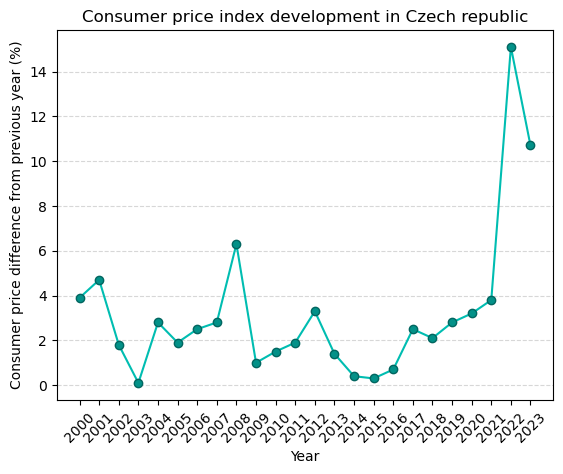

In [80]:
plot_area(['total'])

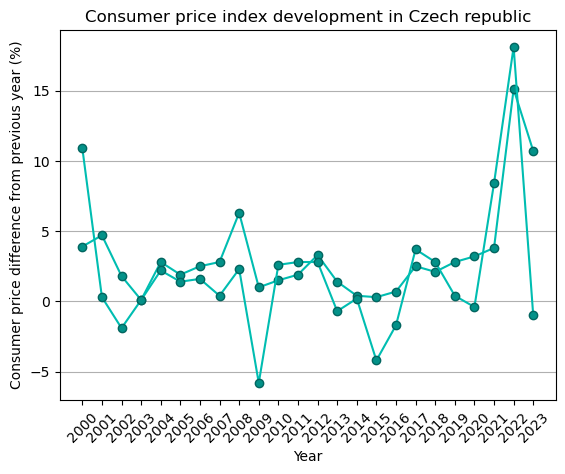

In [41]:
plot_area(['total', 'Doprava'])